In [62]:
from sklearn import datasets
import pandas as pd

In [67]:
data = datasets.load_boston()
X = data.data
y = data.target

In [68]:
boston_df = pd.DataFrame(x)

In [69]:
boston_df.columns = data.feature_names

In [79]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

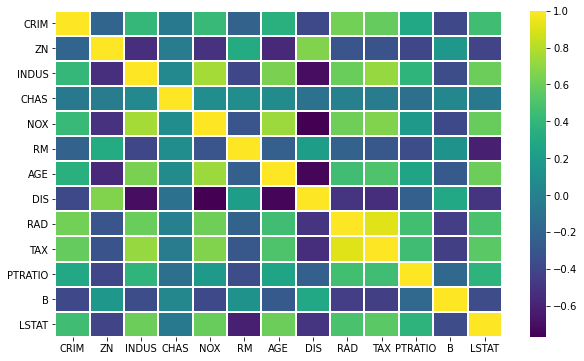

In [44]:
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(boston_df.corr(),cmap = 'viridis',linewidths = 1,ax=ax)

In [45]:
#Normal Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)

In [54]:
y_pred.shape,y_test.shape

((167,), (167,))

In [56]:
print("Training data score:",lr.score(X_train,y_train))
print("Testing data score:",lr.score(X_test,y_test))

Training data score: 0.7392344370995025
Testing data score: 0.7261570836552478


In [71]:
#Now imporving the score by adding new higher order features
for column_name in boston_df.columns:
    boston_df[column_name+"_new"]=boston_df[column_name].apply(lambda x : x**2)

In [72]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS_new,NOX_new,RM_new,AGE_new,DIS_new,RAD_new,TAX_new,PTRATIO_new,B_new,LSTAT_new
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.0,0.289444,43.230625,4251.04,16.728100,1.0,87616.0,234.09,157529.6100,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.0,0.219961,41.229241,6225.21,24.672082,4.0,58564.0,316.84,157529.6100,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.0,0.219961,51.624225,3733.21,24.672082,4.0,58564.0,316.84,154315.4089,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.0,0.209764,48.972004,2097.64,36.750269,9.0,49284.0,349.69,155732.8369,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.0,0.209764,51.079609,2937.64,36.750269,9.0,49284.0,349.69,157529.6100,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,0.0,0.328329,43.467649,4774.81,6.143458,1.0,74529.0,441.00,153656.1601,93.5089
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,0.0,0.328329,37.454400,5882.89,5.232656,1.0,74529.0,441.00,157529.6100,82.4464
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,0.0,0.328329,48.664576,8281.00,4.698056,1.0,74529.0,441.00,157529.6100,31.8096
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,0.0,0.328329,46.158436,7974.49,5.706843,1.0,74529.0,441.00,154802.9025,41.9904


In [80]:
X = boston_df.values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
model = LinearRegression()

In [83]:
model.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred = model.predict(X_test)

In [85]:
print("Training Score:",model.score(X_train,y_train))

Training Score: 0.8256356984021309


In [86]:
print("Testing Score:",model.score(X_test,y_test))

Testing Score: 0.827807418104519
